In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
# Nhập dữ liệu
df = pd.read_csv('data_clear.csv')

df = df .drop(['Unnamed: 0'],axis= 1)

In [ ]:
df

dvcat   dead  airbag seatbelt  frontal sex  ageOFocc occRole  deploy
0     25-39  alive    none   belted        1   f         1  driver       0
1     10-24  alive  airbag   belted        1   f         4  driver       1
2     10-24  alive    none     none        1   f         4  driver       0
3     25-39  alive  airbag   belted        1   f         3  driver       1
4     25-39  alive    none   belted        1   f         2  driver       0
...     ...    ...     ...      ...      ...  ..       ...     ...     ...
7640    55+   dead  airbag     none        0   m         1    pass       1
7641  10-24  alive  airbag   belted        0   f         3  driver       1
7642  10-24  alive  airbag     none        1   m         4  driver       0
7643  25-39   dead    none     none        1   m         3  driver       0
7644  25-39   dead    none   belted        0   f         2  driver       0

[7645 rows x 9 columns]

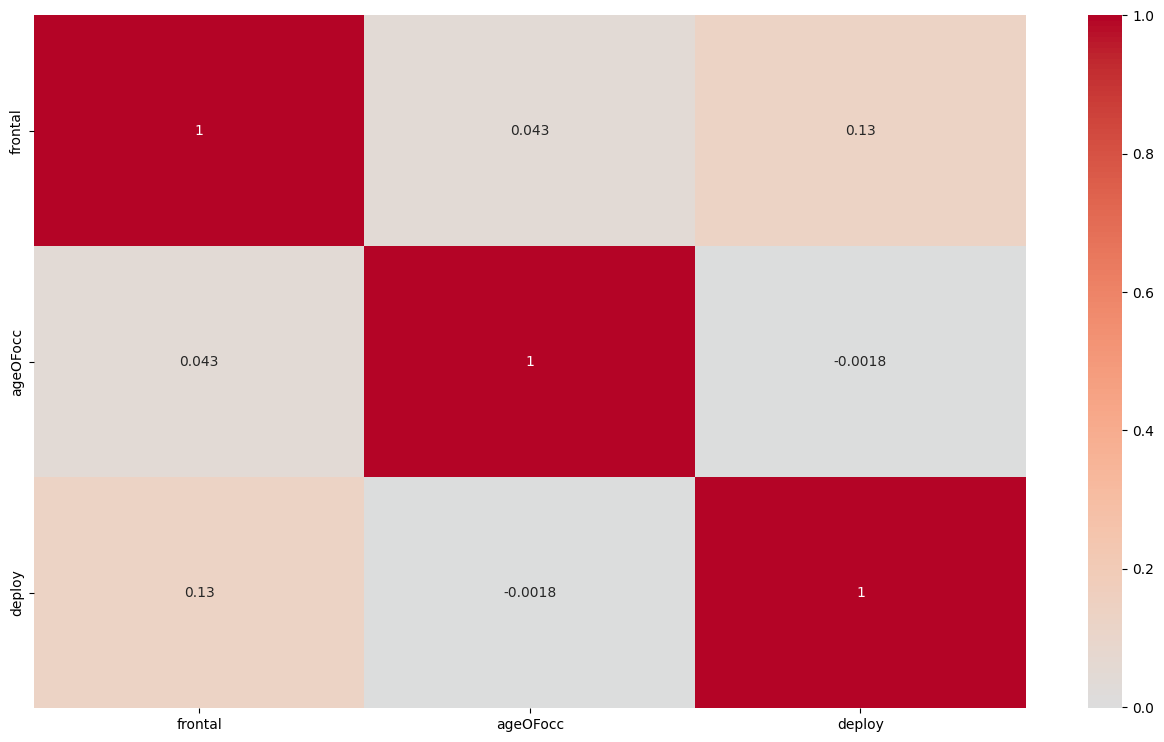

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan
corr_matrix = df_numeric.corr(method='pearson')

# Tạo biểu đồ heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
df

dvcat   dead  airbag seatbelt  frontal sex  ageOFocc occRole  deploy
0     25-39  alive    none   belted        1   f         1  driver       0
1     10-24  alive  airbag   belted        1   f         4  driver       1
2     10-24  alive    none     none        1   f         4  driver       0
3     25-39  alive  airbag   belted        1   f         3  driver       1
4     25-39  alive    none   belted        1   f         2  driver       0
...     ...    ...     ...      ...      ...  ..       ...     ...     ...
7640    55+   dead  airbag     none        0   m         1    pass       1
7641  10-24  alive  airbag   belted        0   f         3  driver       1
7642  10-24  alive  airbag     none        1   m         4  driver       0
7643  25-39   dead    none     none        1   m         3  driver       0
7644  25-39   dead    none   belted        0   f         2  driver       0

[7645 rows x 9 columns]

In [ ]:
df['dvcat'].unique()

array(['25-39', '10-24', '40-54', '55+', '1-9km/h'], dtype=object)

In [ ]:
dummies= pd.get_dummies(df['dvcat'])
dummies= dummies.astype(int)
df = pd.concat([df,dummies],axis=1)
df=df.drop(['dvcat'],axis=1)
df

dead  airbag seatbelt  frontal sex  ageOFocc occRole  deploy  1-9km/h  \
0     alive    none   belted        1   f         1  driver       0        0   
1     alive  airbag   belted        1   f         4  driver       1        0   
2     alive    none     none        1   f         4  driver       0        0   
3     alive  airbag   belted        1   f         3  driver       1        0   
4     alive    none   belted        1   f         2  driver       0        0   
...     ...     ...      ...      ...  ..       ...     ...     ...      ...   
7640   dead  airbag     none        0   m         1    pass       1        0   
7641  alive  airbag   belted        0   f         3  driver       1        0   
7642  alive  airbag     none        1   m         4  driver       0        0   
7643   dead    none     none        1   m         3  driver       0        0   
7644   dead    none   belted        0   f         2  driver       0        0   

      10-24  25-39  40-54  55+  
0         0      1      0    0  
1         1      0      0    0  
2         1      0      0    0  
3         0      1      0    0  
4         0      1      0    0  
...     ...    ...    ...  ...  
7640      0      0      0    1  
7641      1      0      0    0  
7642      1      0      0    0  
7643      0      1      0    0  
7644      0      1      0    0  

[7645 rows x 13 columns]

In [ ]:
# chỉnh cột dead
dead_Temp= {'dead':0,'alive':1}

for dataset in [df] :
  dataset['dead']= dataset['dead'].map(dead_Temp)

df

dead  airbag seatbelt  frontal sex  ageOFocc occRole  deploy  1-9km/h  \
0        1    none   belted        1   f         1  driver       0        0   
1        1  airbag   belted        1   f         4  driver       1        0   
2        1    none     none        1   f         4  driver       0        0   
3        1  airbag   belted        1   f         3  driver       1        0   
4        1    none   belted        1   f         2  driver       0        0   
...    ...     ...      ...      ...  ..       ...     ...     ...      ...   
7640     0  airbag     none        0   m         1    pass       1        0   
7641     1  airbag   belted        0   f         3  driver       1        0   
7642     1  airbag     none        1   m         4  driver       0        0   
7643     0    none     none        1   m         3  driver       0        0   
7644     0    none   belted        0   f         2  driver       0        0   

      10-24  25-39  40-54  55+  
0         0      1      0    0  
1         1      0      0    0  
2         1      0      0    0  
3         0      1      0    0  
4         0      1      0    0  
...     ...    ...    ...  ...  
7640      0      0      0    1  
7641      1      0      0    0  
7642      1      0      0    0  
7643      0      1      0    0  
7644      0      1      0    0  

[7645 rows x 13 columns]

In [ ]:
# Chỉnh airbag
dead_Temp= {'none':0,'airbag':1}

for dataset in [df] :
  dataset['airbag']= dataset['airbag'].map(dead_Temp)

df

dead  airbag seatbelt  frontal sex  ageOFocc occRole  deploy  1-9km/h  \
0        1       0   belted        1   f         1  driver       0        0   
1        1       1   belted        1   f         4  driver       1        0   
2        1       0     none        1   f         4  driver       0        0   
3        1       1   belted        1   f         3  driver       1        0   
4        1       0   belted        1   f         2  driver       0        0   
...    ...     ...      ...      ...  ..       ...     ...     ...      ...   
7640     0       1     none        0   m         1    pass       1        0   
7641     1       1   belted        0   f         3  driver       1        0   
7642     1       1     none        1   m         4  driver       0        0   
7643     0       0     none        1   m         3  driver       0        0   
7644     0       0   belted        0   f         2  driver       0        0   

      10-24  25-39  40-54  55+  
0         0      1      0    0  
1         1      0      0    0  
2         1      0      0    0  
3         0      1      0    0  
4         0      1      0    0  
...     ...    ...    ...  ...  
7640      0      0      0    1  
7641      1      0      0    0  
7642      1      0      0    0  
7643      0      1      0    0  
7644      0      1      0    0  

[7645 rows x 13 columns]

In [ ]:
# chỉnh seatbelt

seatbelt_Temp= {'none':0,'belted':1}

for dataset in [df] :
  dataset['seatbelt']= dataset['seatbelt'].map(seatbelt_Temp)

df

dead  airbag  seatbelt  frontal sex  ageOFocc occRole  deploy  1-9km/h  \
0        1       0         1        1   f         1  driver       0        0   
1        1       1         1        1   f         4  driver       1        0   
2        1       0         0        1   f         4  driver       0        0   
3        1       1         1        1   f         3  driver       1        0   
4        1       0         1        1   f         2  driver       0        0   
...    ...     ...       ...      ...  ..       ...     ...     ...      ...   
7640     0       1         0        0   m         1    pass       1        0   
7641     1       1         1        0   f         3  driver       1        0   
7642     1       1         0        1   m         4  driver       0        0   
7643     0       0         0        1   m         3  driver       0        0   
7644     0       0         1        0   f         2  driver       0        0   

      10-24  25-39  40-54  55+  
0         0      1      0    0  
1         1      0      0    0  
2         1      0      0    0  
3         0      1      0    0  
4         0      1      0    0  
...     ...    ...    ...  ...  
7640      0      0      0    1  
7641      1      0      0    0  
7642      1      0      0    0  
7643      0      1      0    0  
7644      0      1      0    0  

[7645 rows x 13 columns]

In [ ]:
sex_Temp= {'m':0,'f':1}

for dataset in [df] :
  dataset['sex']= dataset['sex'].map(sex_Temp)
df

dead  airbag  seatbelt  frontal  sex  ageOFocc occRole  deploy  1-9km/h  \
0        1       0         1        1    1         1  driver       0        0   
1        1       1         1        1    1         4  driver       1        0   
2        1       0         0        1    1         4  driver       0        0   
3        1       1         1        1    1         3  driver       1        0   
4        1       0         1        1    1         2  driver       0        0   
...    ...     ...       ...      ...  ...       ...     ...     ...      ...   
7640     0       1         0        0    0         1    pass       1        0   
7641     1       1         1        0    1         3  driver       1        0   
7642     1       1         0        1    0         4  driver       0        0   
7643     0       0         0        1    0         3  driver       0        0   
7644     0       0         1        0    1         2  driver       0        0   

      10-24  25-39  40-54  55+  
0         0      1      0    0  
1         1      0      0    0  
2         1      0      0    0  
3         0      1      0    0  
4         0      1      0    0  
...     ...    ...    ...  ...  
7640      0      0      0    1  
7641      1      0      0    0  
7642      1      0      0    0  
7643      0      1      0    0  
7644      0      1      0    0  

[7645 rows x 13 columns]

In [ ]:
df['occRole'].unique()

array(['driver', 'pass'], dtype=object)

In [ ]:
dummies= pd.get_dummies(df['occRole'])
dummies= dummies.astype(int)
df = pd.concat([df,dummies],axis=1)
df=df.drop(['occRole'],axis=1)
df

dead  airbag  seatbelt  frontal  sex  ageOFocc  deploy  1-9km/h  10-24  \
0        1       0         1        1    1         1       0        0      0   
1        1       1         1        1    1         4       1        0      1   
2        1       0         0        1    1         4       0        0      1   
3        1       1         1        1    1         3       1        0      0   
4        1       0         1        1    1         2       0        0      0   
...    ...     ...       ...      ...  ...       ...     ...      ...    ...   
7640     0       1         0        0    0         1       1        0      0   
7641     1       1         1        0    1         3       1        0      1   
7642     1       1         0        1    0         4       0        0      1   
7643     0       0         0        1    0         3       0        0      0   
7644     0       0         1        0    1         2       0        0      0   

      25-39  40-54  55+  driver  pass  
0         1      0    0       1     0  
1         0      0    0       1     0  
2         0      0    0       1     0  
3         1      0    0       1     0  
4         1      0    0       1     0  
...     ...    ...  ...     ...   ...  
7640      0      0    1       0     1  
7641      0      0    0       1     0  
7642      0      0    0       1     0  
7643      1      0    0       1     0  
7644      1      0    0       1     0  

[7645 rows x 14 columns]

In [ ]:
df['ageOFocc'].unique()

array([1, 4, 3, 2])

In [ ]:
dummies= pd.get_dummies(df['ageOFocc'])
dummies= dummies.astype(int)
df = pd.concat([df,dummies],axis=1)
df=df.drop(['ageOFocc'],axis=1)
df = df.rename(columns={1: 'age_1', 2: 'age_2', 3: 'age_3', 4: 'age_4'})
df

dead  airbag  seatbelt  frontal  sex  deploy  1-9km/h  10-24  25-39  \
0        1       0         1        1    1       0        0      0      1   
1        1       1         1        1    1       1        0      1      0   
2        1       0         0        1    1       0        0      1      0   
3        1       1         1        1    1       1        0      0      1   
4        1       0         1        1    1       0        0      0      1   
...    ...     ...       ...      ...  ...     ...      ...    ...    ...   
7640     0       1         0        0    0       1        0      0      0   
7641     1       1         1        0    1       1        0      1      0   
7642     1       1         0        1    0       0        0      1      0   
7643     0       0         0        1    0       0        0      0      1   
7644     0       0         1        0    1       0        0      0      1   

      40-54  55+  driver  pass  age_1  age_2  age_3  age_4  
0         0    0       1     0      1      0      0      0  
1         0    0       1     0      0      0      0      1  
2         0    0       1     0      0      0      0      1  
3         0    0       1     0      0      0      1      0  
4         0    0       1     0      0      1      0      0  
...     ...  ...     ...   ...    ...    ...    ...    ...  
7640      0    1       0     1      1      0      0      0  
7641      0    0       1     0      0      0      1      0  
7642      0    0       1     0      0      0      0      1  
7643      0    0       1     0      0      0      1      0  
7644      0    0       1     0      0      1      0      0  

[7645 rows x 17 columns]

# ID3

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn import metrics

In [ ]:
df_copy = df.copy()
y = df_copy['dead']
x = df_copy.drop('dead', axis=1)  # Các thuộc tính đặc trưng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

# Xây dựng cây ID3
# Tính thời gian chạy thuật toán
start_time = time.time()

regressor = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
regressor.fit(X_train, y_train)
end_time = time.time()
execution_time_ID3 = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time_ID3:.4f} giây")

Thời gian chạy thuật toán: 0.0112 giây


In [ ]:
tree_predict = regressor.predict(X_test)
tree_score = metrics.accuracy_score(y_test,tree_predict)
print("Độ chính xác: ", tree_score)
print("Report: " ,metrics.classification_report(y_test,tree_predict))

Độ chính xác:  0.8496076721883173
Report:                precision    recall  f1-score   support

           0       0.33      0.13      0.19       302
           1       0.88      0.96      0.92      1992

    accuracy                           0.85      2294
   macro avg       0.60      0.55      0.55      2294
weighted avg       0.81      0.85      0.82      2294



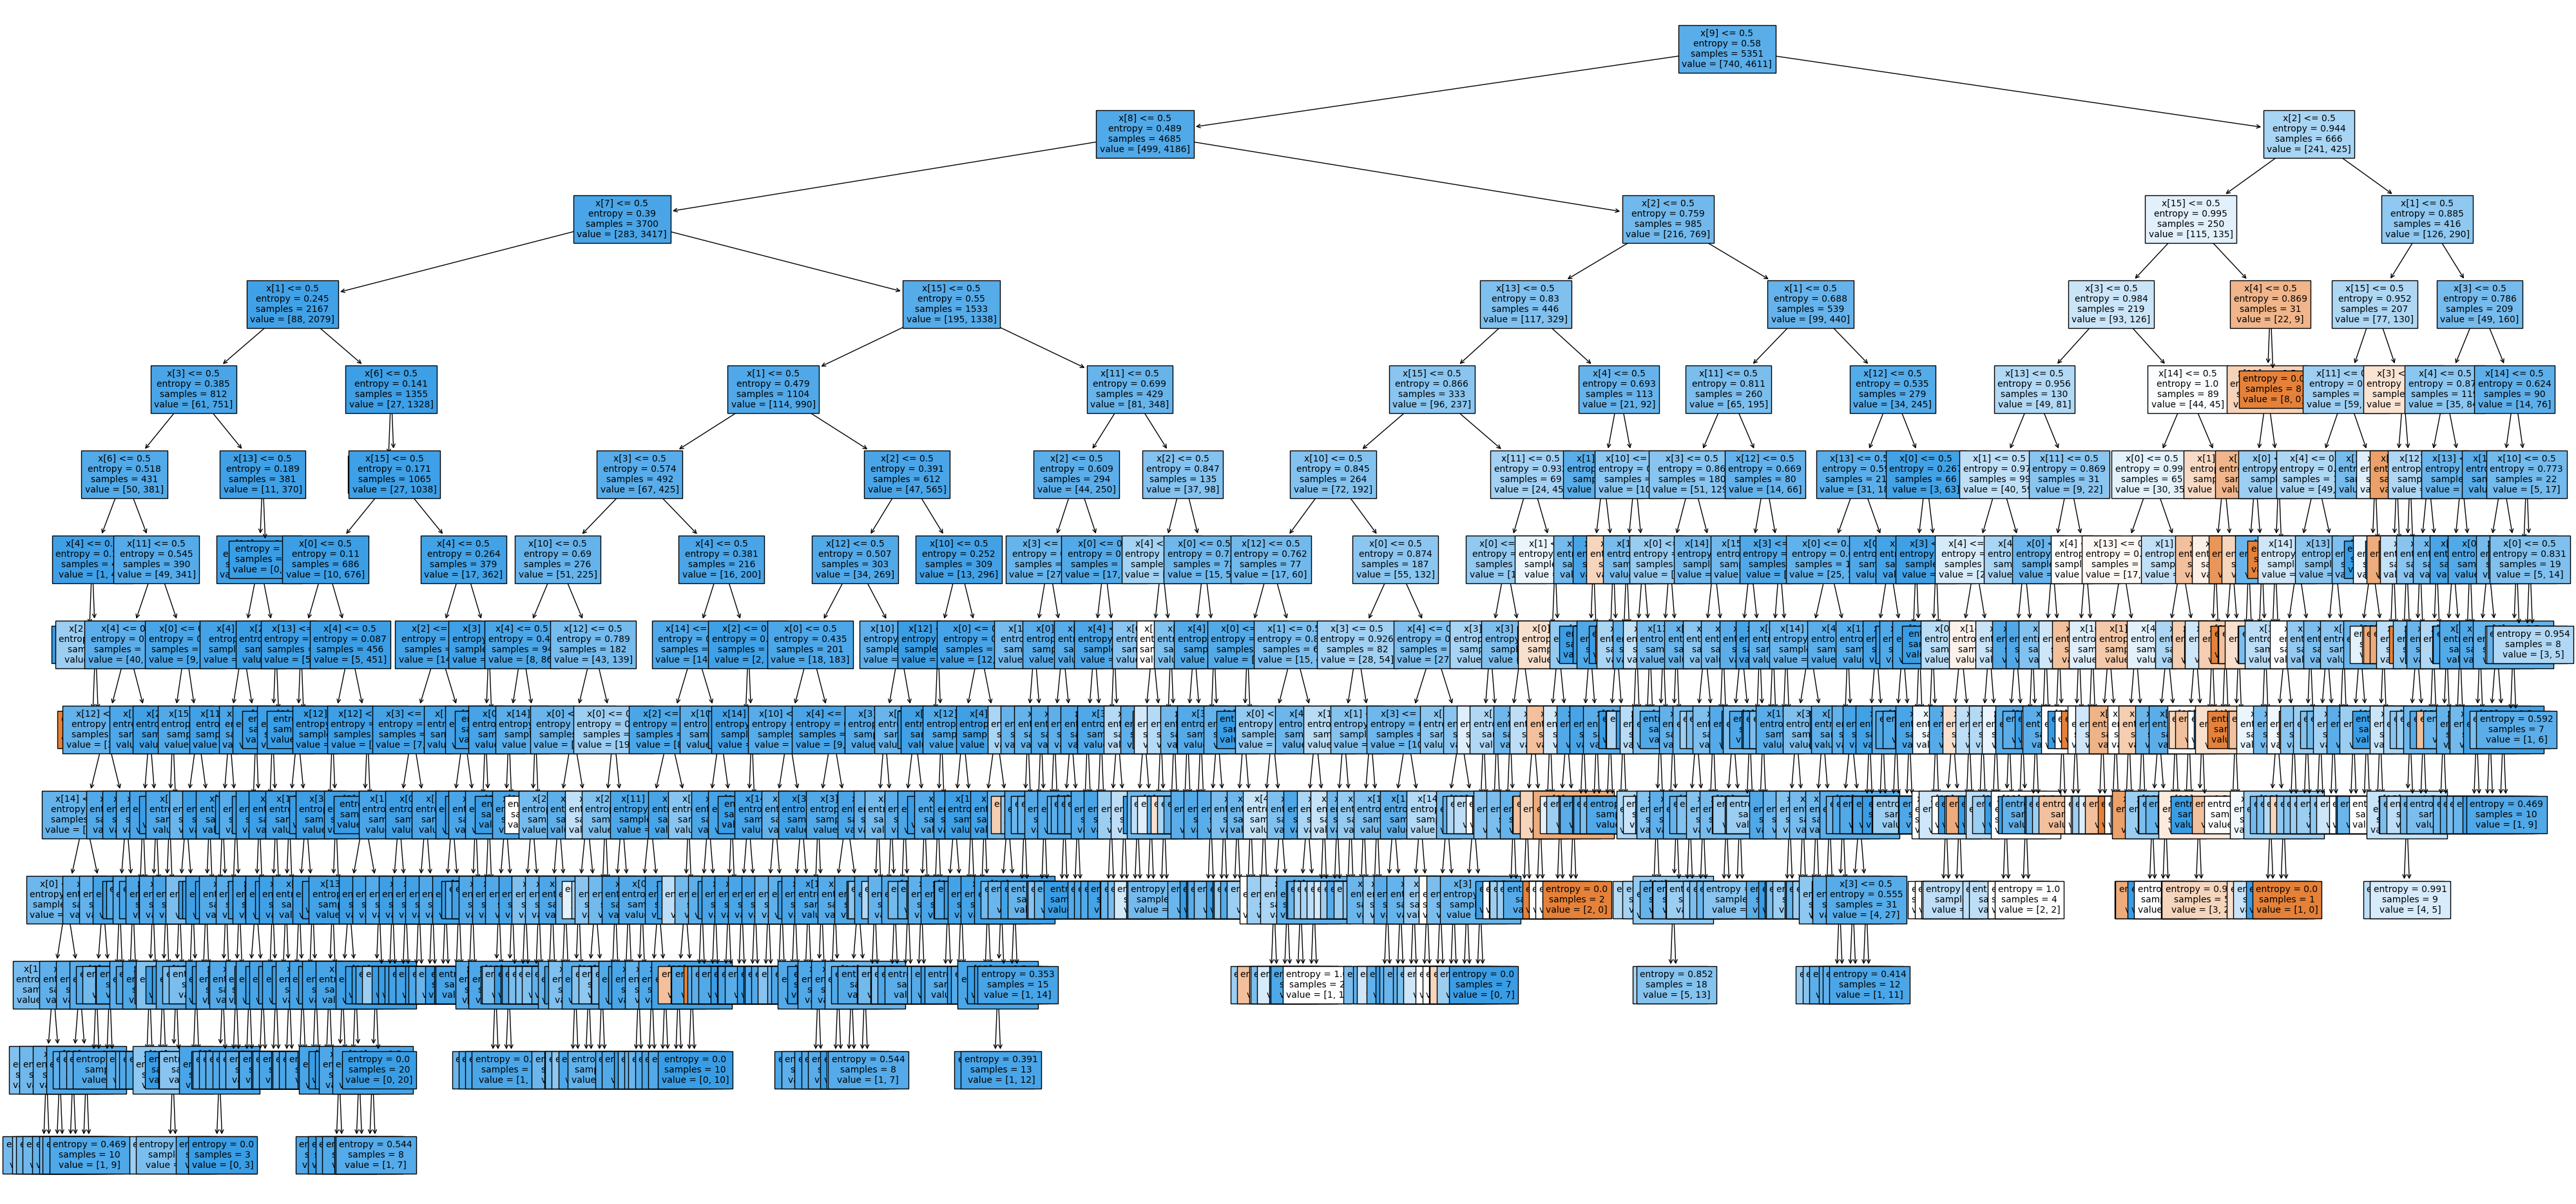

In [ ]:
# 4. Hiển thị cây quyết định bằng biểu đồ
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(regressor,filled=True,fontsize=10)
plt.savefig("Decision_tree",dpi=100)
plt.show()

# Decision Tree Cart Model

In [ ]:
df_copy = df.copy()
df_copy=df_copy.drop(['deploy'],axis=1)
y = df_copy['dead']
x = df_copy.drop('dead', axis=1)  # Các thuộc tính đặc trưng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

# Xây dựng cây ID3
# Tính thời gian chạy thuật toán
start_time = time.time()
cart = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
cart.fit(X_train, y_train)
end_time = time.time()
execution_time_cart = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time_cart:.4f} giây")

Thời gian chạy thuật toán: 0.0131 giây


In [ ]:
tree2_predict = cart.predict(X_test)
tree2_score = metrics.accuracy_score(y_test,tree2_predict)
print("Độ chính xác: ",tree2_score)
print("Report: ",metrics.classification_report(y_test,tree2_predict))

Độ chính xác:  0.8605056669572798
Report:                precision    recall  f1-score   support

           0       0.40      0.11      0.18       302
           1       0.88      0.97      0.92      1992

    accuracy                           0.86      2294
   macro avg       0.64      0.54      0.55      2294
weighted avg       0.82      0.86      0.83      2294



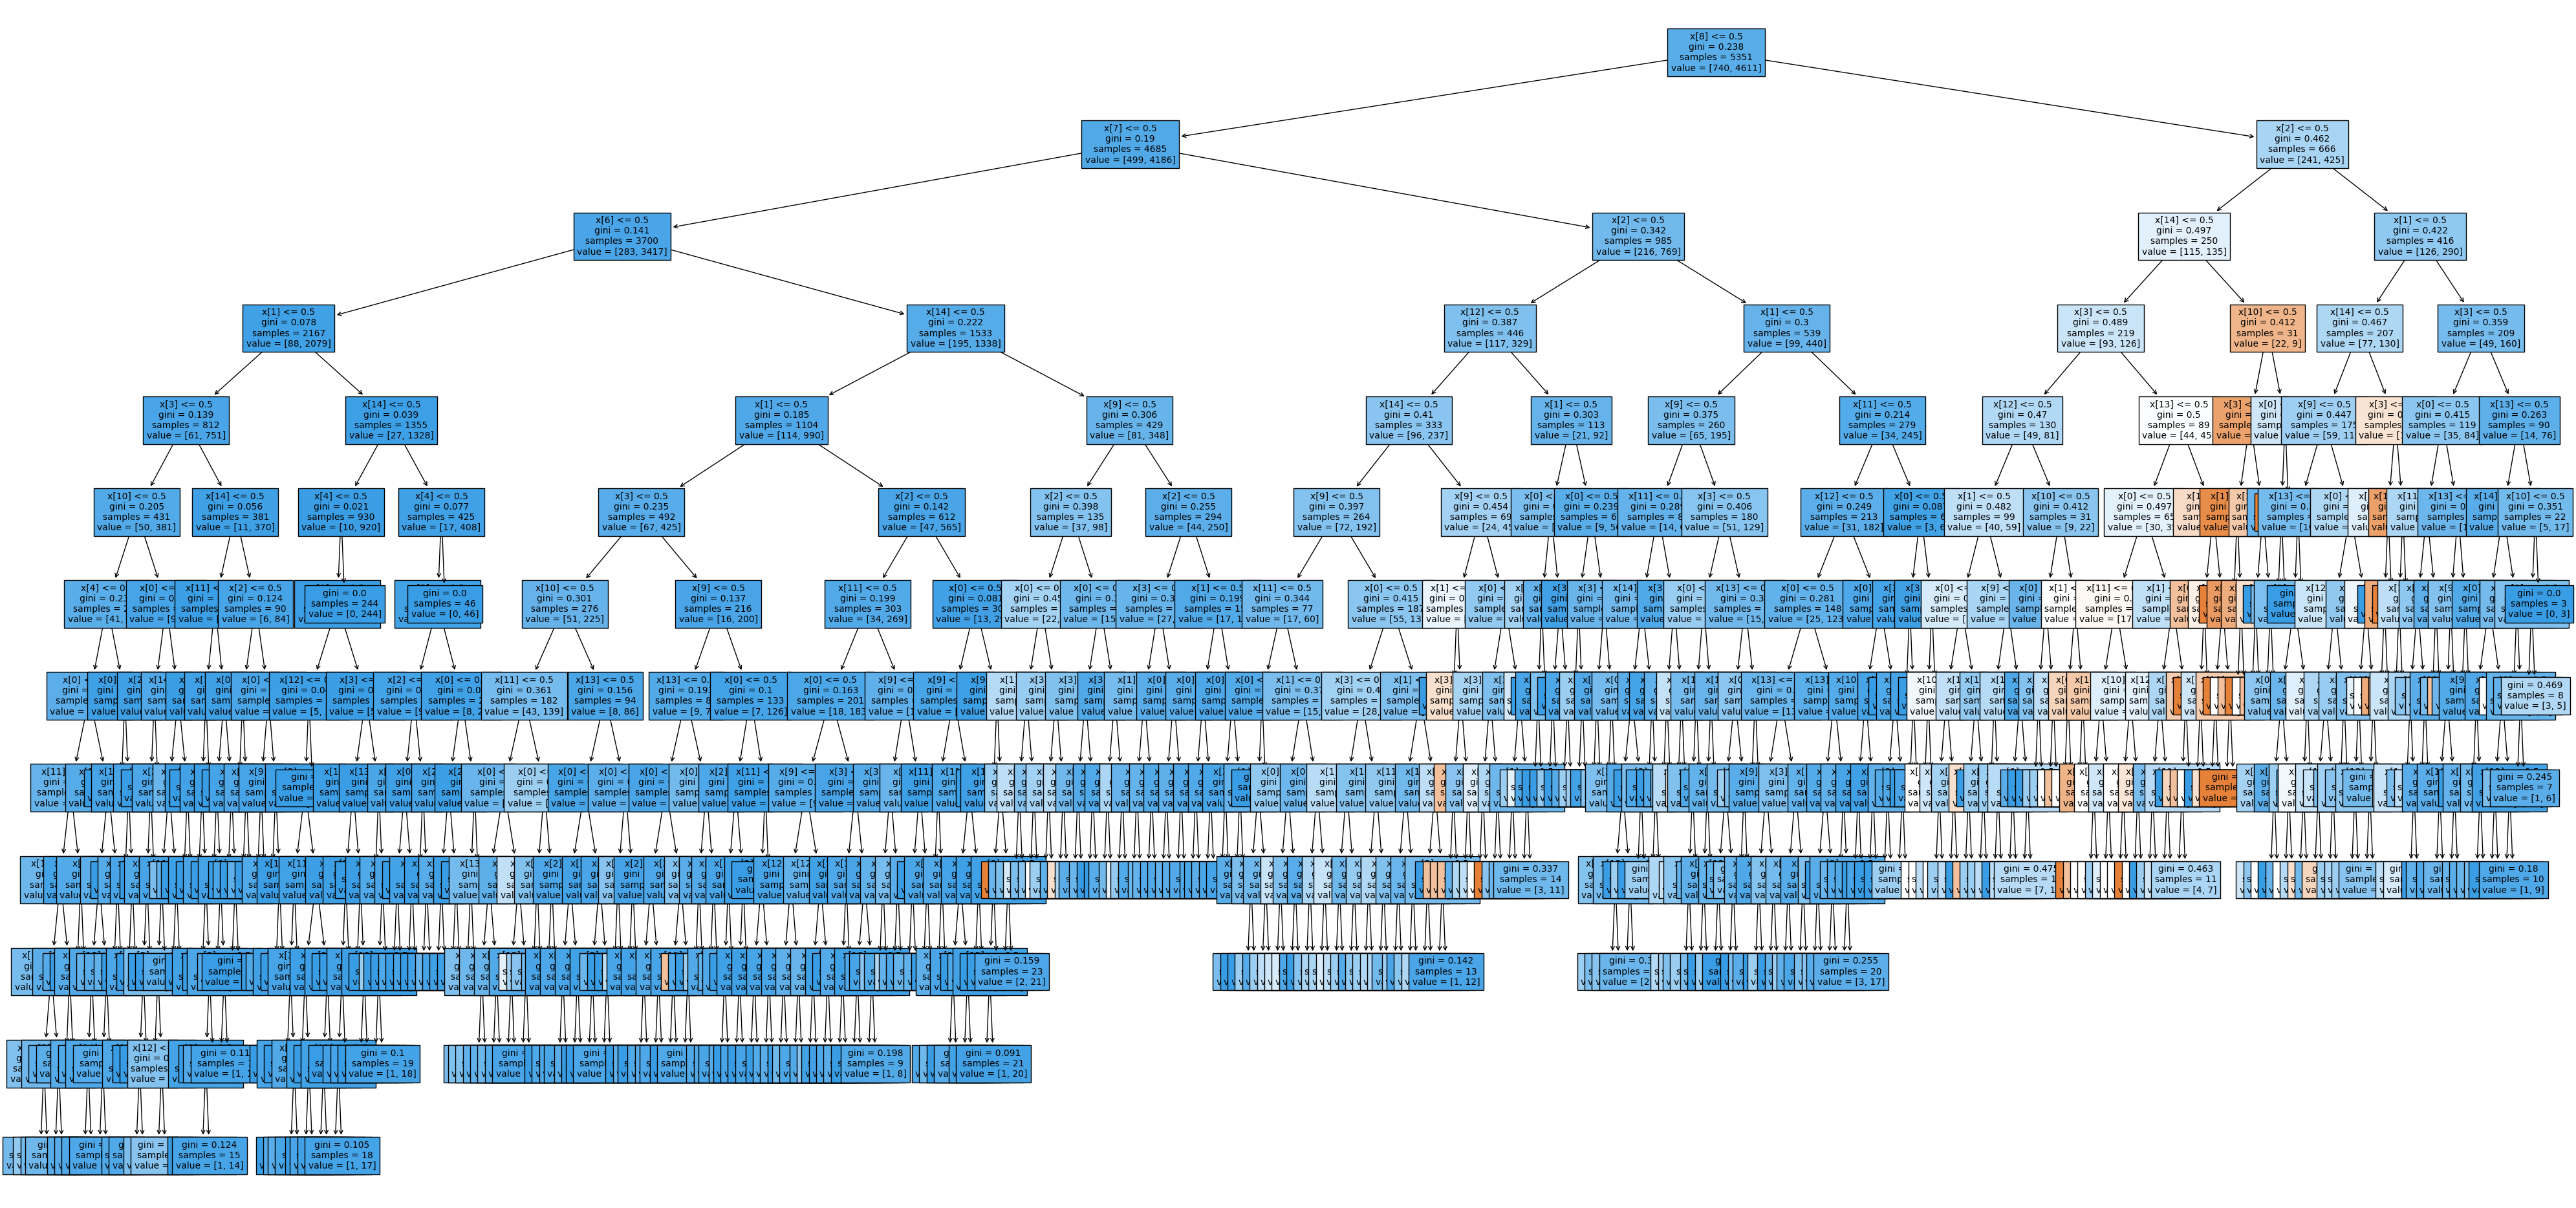

In [ ]:
# 4. Hiển thị cây quyết định bằng biểu đồ
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(cart,filled=True,fontsize=10)
plt.savefig("Decision_tree",dpi=100)
plt.show()

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#KNN
X = df.drop('dead', axis=1)  # Các thuộc tính đặc trưng
y = df['dead']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)net
X_test = scaler.transform(X_test)

start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
end_time = time.time()

# Your existing code
execution_time_knn = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time_knn:.4f} giây")


Thời gian chạy thuật toán: 0.0014 giây


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = knn.predict(X_test)
# Đánh giá mô hình

accuracy_knn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Độ chính xác: {accuracy_knn}")
print("Report:",report)

Độ chính xác: 0.8539668700959023
Report:               precision    recall  f1-score   support

           0       0.37      0.16      0.22       302
           1       0.88      0.96      0.92      1992

    accuracy                           0.85      2294
   macro avg       0.63      0.56      0.57      2294
weighted avg       0.81      0.85      0.83      2294



# RF

In [ ]:
#THUẬT TOÁN RANDOM FOREST
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Correct import
from sklearn.datasets import load_iris  # Import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
df_copy= df.copy()
df_copy=df_copy.drop(['deploy'],axis=1)
y = df_copy['dead']
x = df_copy.drop('dead', axis=1)  # Các thuộc tính đặc trưng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

# Xây dựng RF
# Tính thời gian chạy thuật toán
start_time = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

end_time = time.time()
execution_time_rf = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time_rf:.4f} giây")


Thời gian chạy thuật toán: 0.3741 giây


In [ ]:
# Đánh giá mô hình
rf_predict = rf.predict(X_test)
rf_score = metrics.accuracy_score(y_test,rf_predict)
print("Độ chính xác:" ,rf_score)
print("Báo cáo: ",metrics.classification_report(y_test,rf_predict))

Độ chính xác: 0.8657367044463818
Báo cáo:                precision    recall  f1-score   support

           0       0.45      0.10      0.16       302
           1       0.88      0.98      0.93      1992

    accuracy                           0.87      2294
   macro avg       0.67      0.54      0.54      2294
weighted avg       0.82      0.87      0.83      2294



[Text(0.5757532318598833, 0.9615384615384616, 'x[3] <= 0.5\ngini = 0.224\nsamples = 3364\nvalue = [688, 4663]'),
 Text(0.3353445579649708, 0.8846153846153846, 'x[1] <= 0.5\ngini = 0.261\nsamples = 1731\nvalue = [432, 2370]'),
 Text(0.21103523769808175, 0.8076923076923077, 'x[13] <= 0.5\ngini = 0.332\nsamples = 798\nvalue = [272, 1023]'),
 Text(0.15622393661384487, 0.7307692307692307, 'x[4] <= 0.5\ngini = 0.337\nsamples = 603\nvalue = [208, 761]'),
 Text(0.1545558798999166, 0.6538461538461539, 'x[5] <= 0.5\ngini = 0.344\nsamples = 584\nvalue = [208, 734]'),
 Text(0.10644286905754796, 0.5769230769230769, 'x[6] <= 0.5\ngini = 0.392\nsamples = 385\nvalue = [168, 459]'),
 Text(0.07547956630525438, 0.5, 'x[14] <= 0.5\ngini = 0.449\nsamples = 213\nvalue = [112, 217]'),
 Text(0.04837364470391994, 0.4230769230769231, 'x[7] <= 0.5\ngini = 0.438\nsamples = 176\nvalue = [87, 182]'),
 Text(0.026688907422852376, 0.34615384615384615, 'x[9] <= 0.5\ngini = 0.479\nsamples = 88\nvalue = [53, 80]'),
 Text

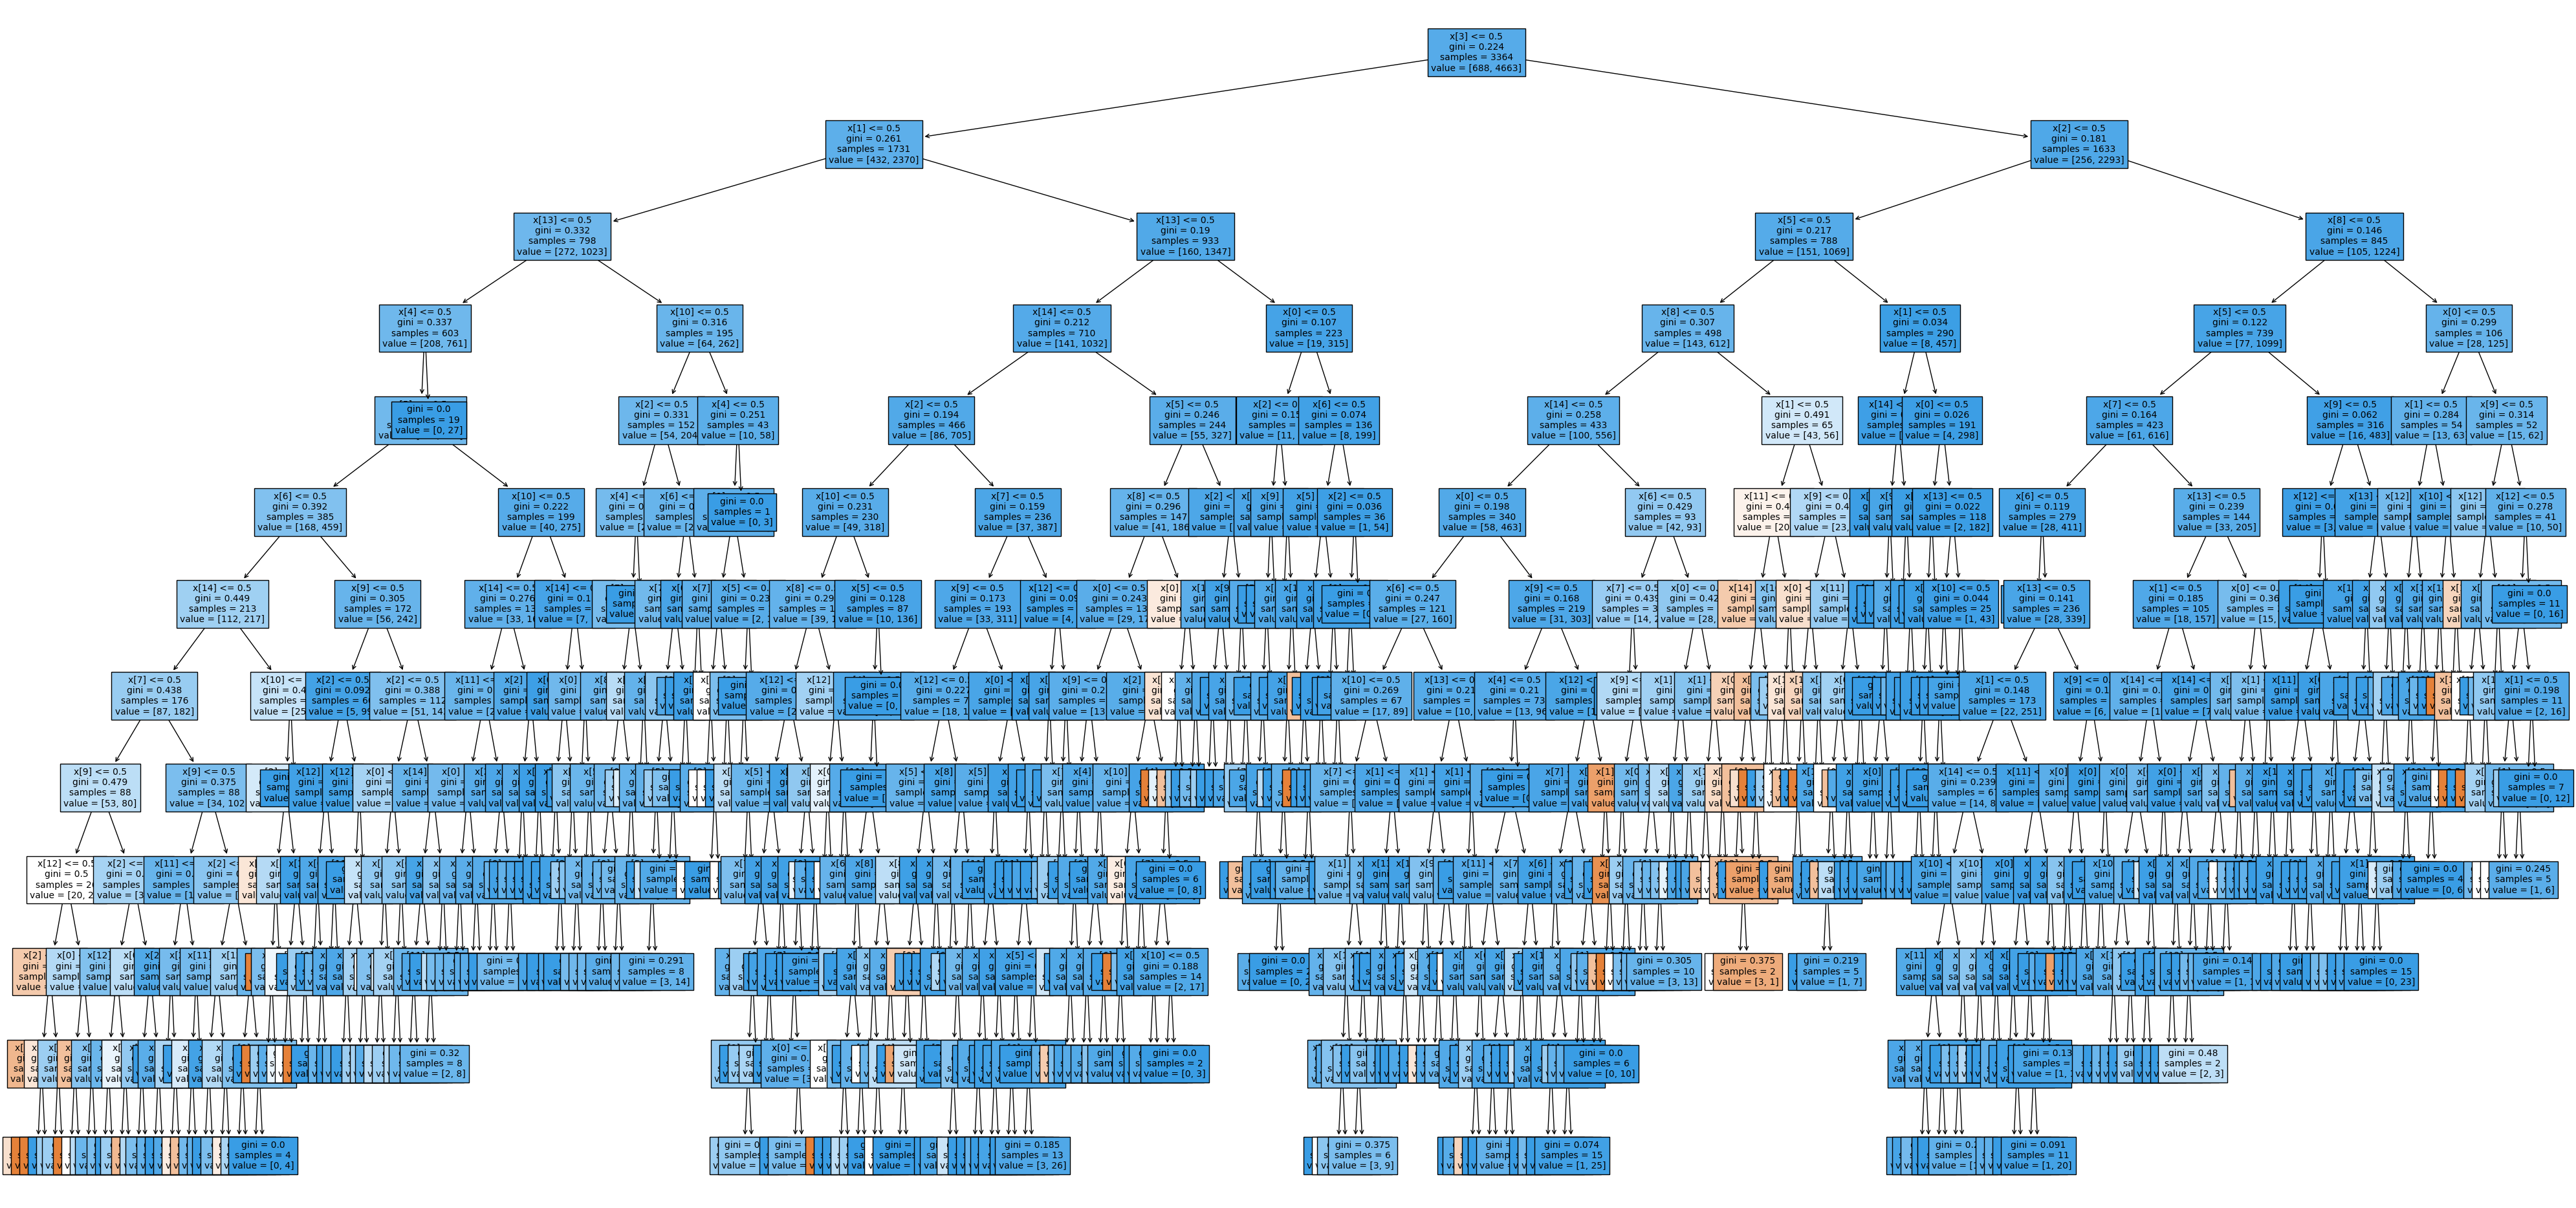

In [ ]:
#Mô hình rừng ngẫu nhiên
individual_tree = rf.estimators_[0]

fig,ax = plt.subplots(figsize=(50,24))
plot_tree(individual_tree,filled=True,fontsize=10)

# Bagging_Classifier

In [ ]:
#THUẬT TOÁN Bagging_Classifier
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn import metrics

In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop(['deploy'], axis=1)
y = df_copy['dead']
x = df_copy.drop('dead', axis=1)  # Các thuộc tính đặc trưng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Xây dựng Bagging Classifier
# Tính thời gian chạy thuật toán
start_time = time.time()

bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train, y_train)

end_time = time.time()
execution_time_bc = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time_bc:.4f} giây")


Thời gian chạy thuật toán: 0.0691 giây


In [ ]:
# Đánh giá mô hình
bagging_clf_predict = bagging_clf.predict(X_test)
bagging_clf_score = metrics.accuracy_score(y_test,bagging_clf_predict)
print("Độ chính xác: ",bagging_clf_score)
print("Report: ",metrics.classification_report(y_test,bagging_clf_predict))

Độ chính xác:  0.8578901482127289
Report:                precision    recall  f1-score   support

           0       0.36      0.10      0.16       302
           1       0.88      0.97      0.92      1992

    accuracy                           0.86      2294
   macro avg       0.62      0.54      0.54      2294
weighted avg       0.81      0.86      0.82      2294



# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

X = df.drop('dead', axis=1)  # Các thuộc tính đặc trưng
y = df['dead']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

start_time = time.time()
lf = LogisticRegression()
lf.fit(X_train, y_train)
end_time = time.time()

# Thời gian chạy thuật toán
execution_time_lr = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time_lr:.4f} giây")




Thời gian chạy thuật toán: 0.0246 giây


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = lf.predict(X_test)
# Đánh giá mô hình

accuracy_lr = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Độ chính xác: {accuracy_lr}")
print("Report:",report)

Độ chính xác: 0.8718395815170009
Report:               precision    recall  f1-score   support

           0       0.62      0.07      0.12       302
           1       0.88      0.99      0.93      1992

    accuracy                           0.87      2294
   macro avg       0.75      0.53      0.53      2294
weighted avg       0.84      0.87      0.82      2294



# Native bayes

In [ ]:
# Thuật toán Native Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import time

In [ ]:

x = df.drop('dead', axis=1)  # Các thuộc tính đặc trưng
y = df['dead']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

# Khởi tạo và huấn luyện mô hình Native Bayes
model = MultinomialNB()

# Đo thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình
model.fit(x_train, y_train)

# Tính thời gian huấn luyện
end_time = time.time()
training_time = end_time - start_time

# Đo thời gian dự đoán
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()

# Tính thời gian dự đoán
prediction_time_nb = end_time - start_time
print(f'Thời gian dự đoán: {prediction_time_nb:.4f} giây')


Thời gian dự đoán: 0.0070 giây


In [ ]:
# Đánh giá mô hình
accuracy_nb = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy: ", accuracy_nb)
print("Report: ", report)

Accuracy:  0.8679163034001743
Report:                precision    recall  f1-score   support

           0       0.33      0.00      0.01       302
           1       0.87      1.00      0.93      1992

    accuracy                           0.87      2294
   macro avg       0.60      0.50      0.47      2294
weighted avg       0.80      0.87      0.81      2294



# Suport Vector Machine

In [ ]:
# Thuật toán Suport Vector Machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import time

In [ ]:
x = df.drop('dead', axis=1)  # Các thuộc tính đặc trưng
y = df['dead']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

# Xây dựng pipeline với scaler và mô hình SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf')) # Có thể thử các kernel khác như 'rbf'
])

# Khởi tạo và huấn luyện mô hình SVM
model = pipeline.fit(x_train, y_train)

# Đo thời gian huấn luyện
start_time = time.time()
end_time = time.time()

# Tính thời gian huấn luyện
training_time = end_time - start_time

# Đo thời gian dự đoán
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()

# Tính thời gian dự đoán
prediction_time_svm = end_time - start_time
print(f'Thời gian dự đoán: {prediction_time_svm:.4f} giây')


Thời gian dự đoán: 0.2531 giây


In [ ]:
# Đánh giá mô hình
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy: ", accuracy_svm)
print("Report: ", report)

Accuracy:  0.8718395815170009
Report:                precision    recall  f1-score   support

           0       0.79      0.04      0.07       302
           1       0.87      1.00      0.93      1992

    accuracy                           0.87      2294
   macro avg       0.83      0.52      0.50      2294
weighted avg       0.86      0.87      0.82      2294



# Phân tích và đánh giá thời gian chạy các giải thuật

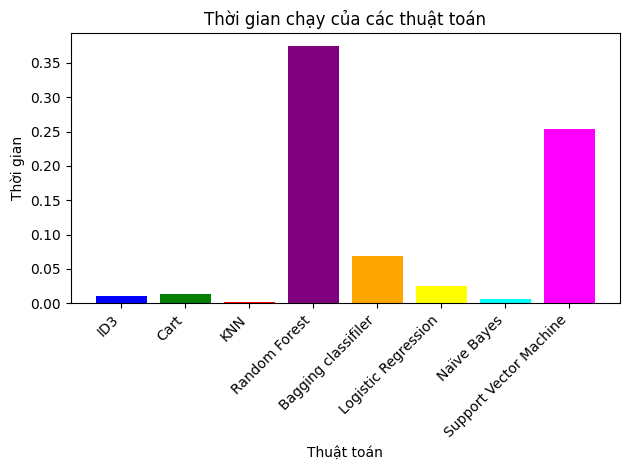

In [ ]:
du_lieu = {'ID3': execution_time_ID3, 'Cart': execution_time_cart, 'KNN':execution_time_knn, 'Random Forest': execution_time_rf
,'Bagging classifiler' :execution_time_bc , 'Logistic Regression':execution_time_lr,'Naïve Bayes':prediction_time_nb ,'Support Vector Machine' :prediction_time_svm }
danh_sach_ten = list(du_lieu.keys())
danh_sach_gia_tri = list(du_lieu.values())
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta']
plt.bar(danh_sach_ten, danh_sach_gia_tri, color=colors)

plt.xlabel('Thuật toán')
plt.ylabel('Thời gian')

# Đặt tiêu đề cho biểu đồ
plt.title('Thời gian chạy của các thuật toán')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

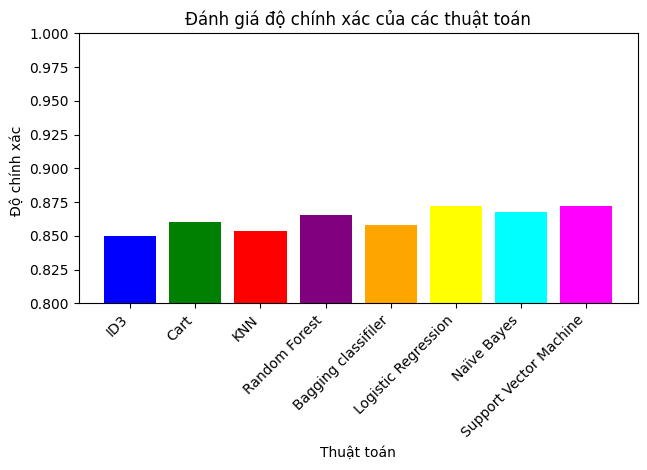

In [ ]:

# đánh giá độ chinh xác các thuật toán
du_lieu = {'ID3':tree_score, 'Cart':tree2_score, 'KNN':accuracy_knn, 'Random Forest':rf_score
,'Bagging classifiler' :bagging_clf_score , 'Logistic Regression':accuracy_lr,'Naïve Bayes':accuracy_nb ,'Support Vector Machine' :accuracy_svm }
danh_sach_ten = list(du_lieu.keys())
danh_sach_gia_tri = list(du_lieu.values())
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta']
plt.bar(danh_sach_ten, danh_sach_gia_tri, color=colors)

plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác ')

# Đặt tiêu đề cho biểu đồ
plt.title('Đánh giá độ chính xác của các thuật toán')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0.8, 1.0)
# Hiển thị biểu đồ
plt.show()